In [1]:
import os, sys
sys.path.append(os.getcwd()+'/..')

In [2]:
from __future__ import division
from support._setting import tsht_dir, tsdt_dir, wf_dir
from support.charts import bar_chart, one_bar_chart, two_pie_chart, multiple_line_chart
from support._setting import DInAP_PInAP, DInAP_POutAP, DOutAP_PInAP, DOutAP_POutAP
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline 

# Data loading and representation

In [3]:
df_dt_whole = pd.read_csv('%s/%s'%(tsdt_dir, 'whole-driver-tm.csv'))
df_dt_whole = df_dt_whole[(df_dt_whole['driver-id'] != -1)]
df_ht_whole = pd.read_csv('%s/%s'%(tsht_dir, 'whole-hour-tm.csv'))
df_wt_fare_whole = pd.read_csv('%s/%s'%(wf_dir, 'whole_wt_and_fare.csv'))

Represent data with driver-id

In [4]:
print df_dt_whole[:5]
print df_dt_whole[-5:]

   yy  mm  dd  dow  driver-id  trip-mode  trip-mode-num  fare-sum
2   9   1   1  Thu          1          3              9     12329
3   9   1   1  Thu          2          3              7      4730
4   9   1   1  Thu          7          3             16     20859
5   9   1   1  Thu          8          3             17     14977
6   9   1   1  Thu         10          3             27     31497
          yy  mm  dd  dow  driver-id  trip-mode  trip-mode-num  fare-sum
23171164  10  12  31  Fri      59922          3             19     22659
23171165  10  12  31  Fri      59945          1              1      1395
23171166  10  12  31  Fri      59945          3              7      9555
23171167  10  12  31  Fri      59948          3             22     23320
23171168  10  12  31  Fri      59954          3              2      2165


Represent data with hour

In [5]:
print df_ht_whole[:5]
print df_ht_whole[-5:]

     yy  mm  dd  dow  hh  trip-mode  trip-mode-num  fare-sum
0  2009   1   1  Thu   0          0              8     14810
1  2009   1   1  Thu   0          1             27     39309
2  2009   1   1  Thu   0          2            327    829920
3  2009   1   1  Thu   0          3          20147  28994436
4  2009   1   1  Thu   1          0             38     91486
         yy  mm  dd  dow  hh  trip-mode  trip-mode-num  fare-sum
64035  2010  12  31  Fri  22          3          21813  25401785
64036  2010  12  31  Fri  23          0            115    258437
64037  2010  12  31  Fri  23          1             48     63576
64038  2010  12  31  Fri  23          2            390    872259
64039  2010  12  31  Fri  23          3          19495  22150114


# Aggregated level analysis

In [6]:
df_dt_2009, df_dt_2010 = df_dt_whole[(df_dt_whole['yy'] == 9)], df_dt_whole[(df_dt_whole['yy'] == 10)]
# df_ht_2009, df_ht_2010 = df_ht_whole[(df_ht_whole['yy'] == 2009)], df_ht_whole[(df_ht_whole['yy'] == 2010)]

## Basic statistics

### Monthly fare

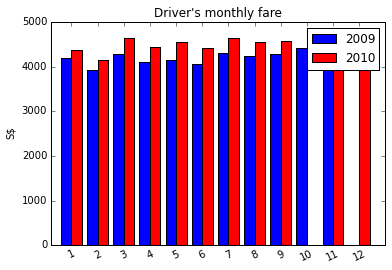

Y2009:  ['4187', '3918', '4285', '4091', '4140', '4054', '4300', '4239', '4273', '4409', '4191', '0']
Y2010:  ['4380', '4151', '4635', '4433', '4544', '4423', '4648', '4553', '4567', '0', '4445', '4658']


In [7]:
groupbed_2009, groupbed_2010 = df_dt_2009.groupby(['mm', 'driver-id']), df_dt_2010.groupby(['mm', 'driver-id'])
mdf_2009 = groupbed_2009.sum()['fare-sum'].to_frame('monthly-fare').reset_index()
mdf_2010 = groupbed_2010.sum()['fare-sum'].to_frame('monthly-fare').reset_index()
groupbed_2009, groupbed_2010 = mdf_2009.groupby(['mm']), mdf_2010.groupby(['mm'])
mf_2009 = list(groupbed_2009.mean()['monthly-fare'])
mf_2010 = list(groupbed_2010.mean()['monthly-fare'])
# Consider corrupted data
mf_2009.insert(12-1,0)
mf_2010.insert(10-1,0)
#
# Change currency unit
mf_2009, mf_2010 = [x/100 for x in mf_2009], [x/100 for x in mf_2010]
#
one_bar_chart("Driver's monthly fare", 'S$', 
              [str(x+1) for x in xrange(12)], 
              mf_2009, mf_2010, ['2009', '2010'])
print 'Y2009: ', str(['%d'%x for x in mf_2009]) 
print 'Y2010: ', str(['%d'%x for x in mf_2010]) 

**Question**
Do the basic fare increases in 2010??

### Daily fare for each day of week

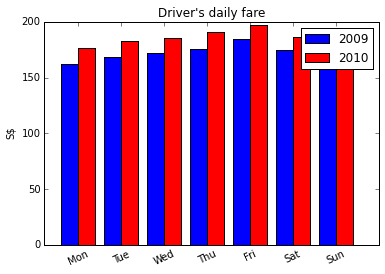

Y2009:  ['162', '168', '171', '175', '184', '174', '159']
Y2010:  ['176', '182', '185', '190', '197', '186', '170']


In [8]:
groupbed_2009, groupbed_2010 = df_dt_2009.groupby(['mm','dd','dow', 'driver-id']), df_dt_2010.groupby(['mm','dd','dow', 'driver-id'])
daily_df_2009 = groupbed_2009.sum()['fare-sum'].to_frame('daily-fare').reset_index()
daily_df_2010 = groupbed_2010.sum()['fare-sum'].to_frame('daily-fare').reset_index()
df_2009 = daily_df_2009.groupby(['dow']).mean()['daily-fare'].to_frame('avg-daily-fare').reset_index()
df_2010 = daily_df_2010.groupby(['dow']).mean()['daily-fare'].to_frame('avg-daily-fare').reset_index()
# Order day of week
week_order = ['Mon','Tue', 'Wed','Thu','Fri','Sat','Sun']
_df_2009, _df_2010 = [None]* len(week_order), [None]* len(week_order)
for _, (dow, avg_m_fare) in df_2009.iterrows():
    _df_2009[week_order.index(dow)] = avg_m_fare
for _, (dow, avg_m_fare) in df_2010.iterrows():
    _df_2010[week_order.index(dow)] = avg_m_fare
# Change currency unit
df_2009, df_2010 = [x/100 for x in _df_2009], [x/100 for x in _df_2010]
#
one_bar_chart("Driver's daily fare", 'S$', 
              week_order, 
              df_2009, df_2010, ['2009', '2010'])
print 'Y2009: ', str(['%d'%x for x in df_2009]) 
print 'Y2010: ', str(['%d'%x for x in df_2010]) 

### Hourly statistics

In [9]:
groupbed = df_wt_fare_whole.groupby(['dow','hh'])
df1 = groupbed.mean()['total-fare-cent'].to_frame('avg-total-fare-cent')
df2 = groupbed.mean()['ap-fare-cent'].to_frame('avg-ap-fare-cent')
df3 = groupbed.mean()['op-cost-min'].to_frame('avg-op-cost-min')
week_daily_stats = df1.join(df2, how='inner')
week_daily_stats = week_daily_stats.join(df3, how='inner')
week_daily_stats.reset_index()
atfc_dict, aafc_dict, aocm_dict = {}, {}, {}
# Order day of week
week_order = ['Mon','Tue', 'Wed','Thu','Fri','Sat','Sun']
#
for _, (dow, hh, atfc, aafc, aocm) in week_daily_stats.reset_index().iterrows():
    _df_2009[week_order.index(dow)] = avg_m_fare
    if not atfc_dict.has_key(dow):
        atfc_dict[dow] = [None] * 24; aafc_dict[dow] = [None] * 24; aocm_dict[dow] = [None] * 24
    atfc_dict[dow][hh] = atfc / 100; aafc_dict[dow][hh] = aafc / 100; aocm_dict[dow][hh] = aocm / 100
weekly_atf, weekly_aaf, weekly_aocm = [], [], []
for k in week_order:
    weekly_atf.append(atfc_dict[k]); weekly_aaf.append(aafc_dict[k]); weekly_aocm.append(aocm_dict[k])

####  Total fare and Airport fare (not individual driver's average fare, just total) 

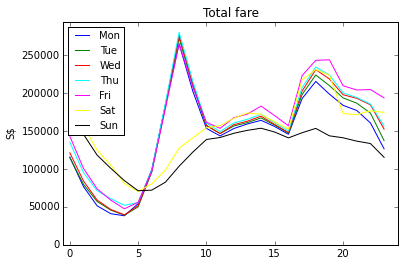

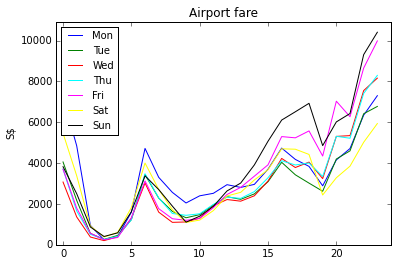

In [10]:
multiple_line_chart('Total fare', 'S$',range(24), weekly_atf, week_order)
multiple_line_chart('Airport fare', 'S$', range(24), weekly_aaf, week_order)

#### Opportunity cost (cost/minitues)

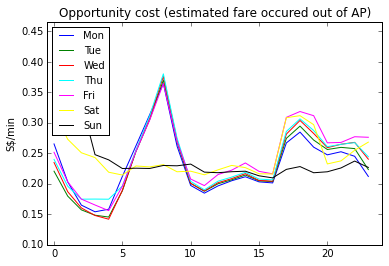

In [11]:
multiple_line_chart('Opportunity cost (estimated fare occured out of AP)', 'S$/min', range(24), weekly_aocm, week_order)

### Average waiting time in the airport

In [12]:
# TODO

## Statistics for each trip mode

There are four trip modes depending on the previous trip and the current trip.

Their representations are as follows;
- Drop off InAP - Pick up InAP             -> DInAP-PInAP
- Drop off InAP - Pick up OutAP            -> DInAP-POutAP
- Drop off OutAP - Pick up InAP            -> DOutAP-PInAP
- Drop off OutAP - Pick up OutAP           -> DOutAP-POutAP

When we consider fares, they are about current trips.

### Fare/Trip

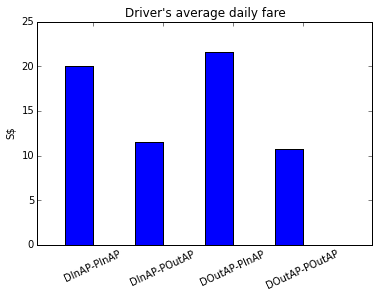

In [13]:
df_dt_whole['fare (S$)/trip'] = (df_dt_whole['fare-sum'] / df_dt_whole['trip-mode-num']) / 100


bar_chart("Driver's average daily fare", 'S$', ['DInAP-PInAP', 'DInAP-POutAP', 'DOutAP-PInAP', 'DOutAP-POutAP'],\
             df_dt_whole.groupby(['trip-mode']).mean()['fare (S$)/trip'])


### Changes in drivers' decision, when they dropped passengers in the airport

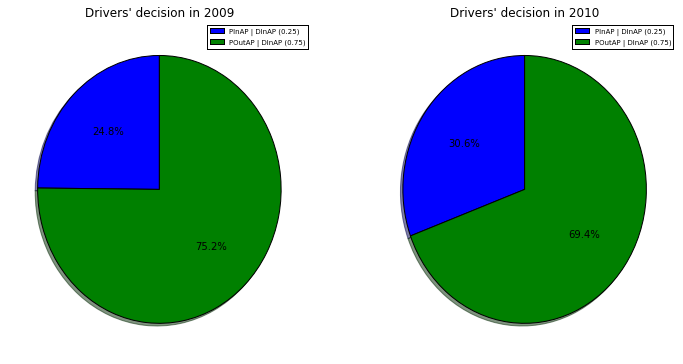

In [14]:
groupbed_2009, groupbed_2010 = df_dt_2009.groupby(['trip-mode']), df_dt_2010.groupby(['trip-mode'])
ytn_2009 = groupbed_2009.sum()['trip-mode-num'].to_frame('num. Y2009').reset_index()
ytn_2010 = groupbed_2010.sum()['trip-mode-num'].to_frame('num. Y2010').reset_index()
Y2009_num_DInAP_PInAP, Y2009_num_DInAP_POutAP = ytn_2009.at[DInAP_PInAP,'num. Y2009'], ytn_2009.at[DInAP_POutAP,'num. Y2009']
Y2010_num_DInAP_PInAP, Y2010_num_DInAP_POutAP = ytn_2010.at[DInAP_PInAP,'num. Y2010'], ytn_2010.at[DInAP_POutAP,'num. Y2010']

labels = ['PInAP | DInAP', 'POutAP | DInAP']
data_2009 = [d / (Y2009_num_DInAP_PInAP + Y2009_num_DInAP_POutAP) for d in [Y2009_num_DInAP_PInAP, Y2009_num_DInAP_POutAP]]
data_2010 = [d / (Y2010_num_DInAP_PInAP + Y2010_num_DInAP_POutAP) for d in [Y2010_num_DInAP_PInAP, Y2010_num_DInAP_POutAP]]

two_pie_chart(labels, "Drivers' decision in 2009", data_2009, "Drivers' decision in 2010", data_2010)

### Changes in drivers' decision, when they dropped passengers out of the airport

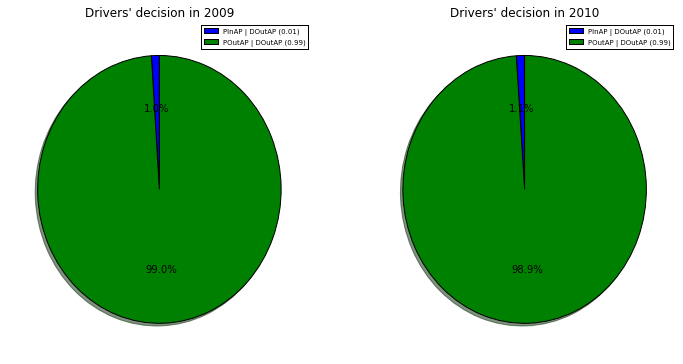

In [49]:
DInAP_PInAP, DInAP_POutAP, DOutAP_PInAP, DOutAP_POutAP

Y2009_num_DOutAP_PInAP, Y2009_num_DOutAP_POutAP = ytn_2009.at[DOutAP_PInAP,'num. Y2009'], ytn_2009.at[DOutAP_POutAP,'num. Y2009']
Y2010_num_DOutAP_PInAP, Y2010_num_DOutAP_POutAP = ytn_2010.at[DOutAP_PInAP,'num. Y2010'], ytn_2010.at[DOutAP_POutAP,'num. Y2010']

labels = ['PInAP | DOutAP', 'POutAP | DOutAP']
data_2009 = [d / (Y2009_num_DOutAP_PInAP + Y2009_num_DOutAP_POutAP) for d in [Y2009_num_DOutAP_PInAP, Y2009_num_DOutAP_POutAP]]
data_2010 = [d / (Y2010_num_DOutAP_PInAP + Y2010_num_DOutAP_POutAP) for d in [Y2010_num_DOutAP_PInAP, Y2010_num_DOutAP_POutAP]]

two_pie_chart(labels, "Drivers' decision in 2009", data_2009, "Drivers' decision in 2010", data_2010)

# Individual level analysis

Select drivers who worked in both years, in 2009 and in 2010

In [16]:
Y2009_drivers, Y2010_drivers = set(df_dt_2009['driver-id']), set(df_dt_2010['driver-id'])
both_year_drivers = list(Y2009_drivers.intersection(Y2010_drivers))
Y2009_df = df_dt_2009[df_dt_2009['driver-id'].isin(both_year_drivers)]
Y2010_df = df_dt_2010[df_dt_2010['driver-id'].isin(both_year_drivers)]

## Compare monthly average fares

In [17]:
groupbed_2009, groupbed_2010 = Y2009_df.groupby(['mm', 'driver-id']), Y2010_df.groupby(['mm', 'driver-id'])
mdf_2009 = groupbed_2009.sum()['fare-sum'].to_frame('monthly-fare').reset_index()
mdf_2010 = groupbed_2010.sum()['fare-sum'].to_frame('monthly-fare').reset_index()
groupbed_2009, groupbed_2010 = mdf_2009.groupby(['driver-id']), mdf_2010.groupby(['driver-id'])
Y2009_fares = (groupbed_2009.mean()['monthly-fare'] / 100)
Y2010_fares = groupbed_2010.mean()['monthly-fare'] / 100
fares_diff = (Y2010_fares-Y2009_fares).to_frame('diff.').reset_index()
positive_diff = fares_diff[fares_diff['diff.'] > 0]
sorted_diff = fares_diff.sort(['diff.'], ascending=[False])

### Proportion of drivers whose Y2010's fares are greater than those of Y2009

In [18]:
print 'Proporttion: ', len(positive_diff) / len(both_year_drivers)

Proporttion:  0.671127849889


In [19]:
print sorted_diff[:5]
print sorted_diff[-5:]
print
print 'Difference mean:\t\t', sorted_diff.mean()['diff.']
print 'Difference std:\t\t\t', sorted_diff.std()['diff.']
print 'Avg increase in upper 25%:\t', sorted_diff[:int(len(both_year_drivers) * 0.25)].mean()['diff.']
print 'Avg decrease in lower 25%:\t', sorted_diff[-int(len(both_year_drivers) * 0.25):].mean()['diff.']

       driver-id         diff.
22931      24324  10461.247273
29736      49744   8422.268182
22923      24314   8326.475455
29404      46250   8004.062000
23070      24601   7860.078990
       driver-id        diff.
5132        5513 -6599.257500
28019      37407 -6666.557273
25989      33710 -6976.017500
4830        5173 -7191.505000
27606      36704 -7456.995455

Difference mean:		265.959818086
Difference std:			934.89230714
Avg increase in upper 25%:	1315.47525751
Avg decrease in lower 25%:	-703.658431532


In [48]:
Y2009_fares = (groupbed_2009.mean()['monthly-fare'] / 100).to_frame('avg-monthly-fare').reset_index()
Y2010_fares = (groupbed_2010.mean()['monthly-fare'] / 100).to_frame('avg-monthly-fare').reset_index()
sorted_Y2009_fares = Y2009_fares.sort(['avg-monthly-fare'], ascending=[False])
sorted_Y2010_fares = Y2010_fares.sort(['avg-monthly-fare'], ascending=[False])

print sorted_Y2009_fares[:5]
print sorted_Y2010_fares[:5]

print sorted_Y2010_fares[sorted_Y2010_fares['driver-id'] == float(22941)].index.tolist()[0]
print 'hi', sorted_Y2010_fares.at[22941, 'driver-id']
# .at[DOutAP_PInAP,'num. Y2009']
# num_raking_increase = 0
# for i, i_row in Y2009_fares.iterrows():
#     for j, j_row in Y2010_fares.iterrows():
#         if i_row['driver-id'] == j_row['driver-id']:
#             if i < j:
#                 num_raking_increase += 1
#             print i,j, count
#             print '\t', i_row['driver-id'], j_row['driver-id']
#             break            
#     print row['driver-id']
#     print sorted_Y2010_fares.at[sorted_Y2010_fares['driver-id'] == row['driver-id'],'driver-id']
# #     print sorted_Y2010_fares[sorted_Y2010_fares['driver-id'] == row['driver-id']]
#     assert False
#     print sorted_Y2010_fares[sorted_Y2010_fares['driver-id'] == row['driver-id']]
#     print
#     print i, sorted_Y2010_fares[sorted_Y2010_fares['driver-id'] == row['driver-id']].index.tolist()[0]
#     if i < sorted_Y2010_fares[sorted_Y2010_fares['driver-id'] == row['driver-id']].index.tolist()[0]:
#         num_raking_increase += 1
print num_raking_increase/ len(both_year_drivers)
    
# a.c1[a.c1 == 8].index.tolist()

        driver-id  avg-monthly-fare
4416        4733      13451.918182
7536        8147      12300.446364
5284        5718      11793.344545
15801      16782      11347.958182
20500      21769      11218.222727
       driver-id  avg-monthly-fare
4416        4733      14277.951818
22941      24335      13291.030909
7536        8147      11958.592727
9575       10263      11956.961818
22931      24324      11754.597273
21621
hi 24335
0.0


TODO!!

Need to consider drivers' whole working time

Considr only fares whose previous trip occured in the airport??